In [1]:
from lavis.models import model_zoo
print(model_zoo)

c:\Users\sethg\miniconda3\envs\ctx\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Architectures                  Types
albef_classification           ve
albef_feature_extractor        base
albef_nlvr                     nlvr
albef_pretrain                 base
albef_retrieval                coco, flickr
albef_vqa                      vqav2
alpro_qa                       msrvtt, msvd
alpro_retrieval                msrvtt, didemo
blip_caption                   base_coco, large_coco
blip_classification            base
blip_feature_extractor         base
blip_image_text_matching       base, large
blip_nlvr                      nlvr
blip_pretrain                  base
blip_retrieval                 coco, flickr
blip_vqa                       vqav2, okvqa, aokvqa
blip2_opt                      pretrain_opt2.7b, pretrain_opt6.7b, caption_coco_opt2.7b, caption_coco_opt6.7b
blip2_t5                       pretrain_flant5xl, pretrain_flant5xl_vitL, pretrain_flant5xxl, caption_coco_flant5xl
blip2_feature_extractor        pretrain, pretrain_vitL, coco
blip2                      

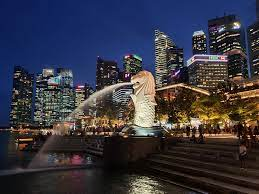

In [15]:
import torch
from PIL import Image
# setup device to use
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# load sample image
raw_image = Image.open("merlion.jpg").convert("RGB")
display(raw_image)

In [16]:
from lavis.models import load_model_and_preprocess
model, vis_processors, _ = load_model_and_preprocess(name="blip2", model_type="coco", is_eval=True, device=device)
# preprocess the image
# vis_processors stores image transforms for "train" and "eval" (validation / testing / inference)
image = vis_processors["eval"](raw_image).unsqueeze(0).to(device)
# generate caption
model.generate({"image": image})

Position interpolate from 16x16 to 26x26


c:\Users\sethg\miniconda3\envs\ctx\lib\site-packages\torch\utils\checkpoint.py:460: UserWarning: torch.utils.checkpoint: please pass in use_reentrant=True or use_reentrant=False explicitly. The default value of use_reentrant will be updated to be False in the future. To maintain current behavior, pass use_reentrant=True. It is recommended that you use use_reentrant=False. Refer to docs for more details on the differences between the two variants.
  warnings.warn(
c:\Users\sethg\miniconda3\envs\ctx\lib\site-packages\torch\utils\checkpoint.py:90: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn(


['a fountain spewing water into the air in front of a city skyline']

In [18]:
with open("./neocortex/description.txt", "w") as clear_file:
    clear_file.write("")

n = 0
for i in range(5):
    raw_image = Image.open(f"frames/frame{n}.jpg").convert("RGB")
    image = vis_processors["eval"](raw_image).unsqueeze(0).to(device)
    # generate caption
    cap = model.generate({"image": image})
    # save caption
    f = open("./neocortex/description.txt", "a")
    f.write(str(cap))
    f.close()
    # next frame address
    n += 1